##### <h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">DSCI 631: Applied Machine Learning</h2>
<h3 style = "text-align:center">Assignment 3</h3>
<h4> </h4>
<div style="text-align:center; border-style:solid; padding: 10px">
<div style="font-weight:bold">Due Date: Sunday, March 14, 2021</div>
This assignment counts for 18% of the final grade
</div>

<h3 style="color:red; font-weight:bold; text-decoration: underline">DON'T FORGET TO PUT YOUR TEAM NUMBER AND MEMBERS' NAMES BELOW</h3>
### TEAM NUMBER:
### TEAM MEMBERS:

### A. Assignment Overview
This assignment provides the opportunity for you to practice with various skills in unsupervised learning, supervised learning learning and feature selection. 

### B. What to Hand In
	
Sumbit a completed this Jupyter notebook. 

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59 pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation.

### F. Academic Honesty

Each student is required to submit the Academic Honesty Form at the beginning of the term to cover all the deliverables (for example: assignments, projects, quizzes). Each piece of work must be original. That means, individual quizzes must be done individually without discussing and collaborating with anybody else. Team assignments must be written and programmed by your own team members. No team should copy any piece of work from other teams. The Drexel University Academic Honesty Rules and Procedures (as stated in the student handbook) will be adhered to strictly.  

### G. Marking Schemes:

Marking assignments will be based on several aspects: presentation, correctness and coding styles. 

For programming questions, 10% of the mark will be judged on the coding style. 

The following is a set of guidelines for the coding style in this course:
1. Write a good comment.
2. Use appropriate indentations to indicate control flows and blocks of code. 
3. When breaking up a long line, break it before an operator, not after. 

### H. Answer the following questions: 
**Your answer should be combined with code and brief text answer.** Please ensure that your Jupyter notebook does not have too much spurious output. If you like, you can share your notebook in progress with me on Kaggle: leiwangv (lw474@drexel.edu)

### Data for part 1 in this assignment:
* URL: http://odds.cs.stonybrook.edu/annthyroid-dataset/
* In this assignment, you should work without the ground truth labels as much as possible. Often inspecting and visualizing the data is the only way to understand the result of clustering and outlier detection.
* For Questions 1-3 visualization, you should look at the plots before making use of the ground truth labels first, then use the ground truth labels to color the points in your plots.

In [ ]:
# uploading files from the local pc
from google.colab import files
myfile = files.upload()


Saving annthyroid.mat to annthyroid.mat


In [ ]:
# You can import the data as follows after download
# Do not submit the data file to Bb Learn
import scipy.io
data = scipy.io.loadmat('annthyroid.mat')

#### Question 1-1:
Create plots to visualize the distribution of all features (both jointly and for each class). Describe your observation.

Then visualize the data using PCA (top two principal components). Make another plot of explained variance (%) in PCA. Discuss what would be a good threshold for the number of principal components if you wanted to reduce the dimensionality of the data?

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
print(type(data))

<class 'dict'>


In [ ]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [ ]:
data_X = data.get("X")
data_y = data.get("y")

In [ ]:
print(type(data_X))

<class 'numpy.ndarray'>


In [ ]:
data_X.shape

(7200, 6)

In [ ]:
df_X = pd.DataFrame(data_X, columns = ['Column_1','Column_2','Column_3','Column_4','Column_5','Column_6'])

In [ ]:
df_y = pd.DataFrame(data_y, columns = ['target'])

In [ ]:
df = pd.concat([df_X,df_y],axis=1)

In [ ]:
df

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,target
0,0.73,0.00060,0.0150,0.120,0.082,0.1460,0
1,0.24,0.00025,0.0300,0.143,0.133,0.1080,0
2,0.47,0.00190,0.0240,0.102,0.131,0.0780,0
3,0.64,0.00090,0.0170,0.077,0.090,0.0850,0
4,0.23,0.00025,0.0260,0.139,0.090,0.1530,0
...,...,...,...,...,...,...,...
7195,0.59,0.00250,0.0208,0.079,0.099,0.0800,0
7196,0.51,0.10600,0.0060,0.005,0.089,0.0055,1
7197,0.51,0.00076,0.0201,0.090,0.067,0.1340,0
7198,0.35,0.00280,0.0201,0.090,0.089,0.1010,0


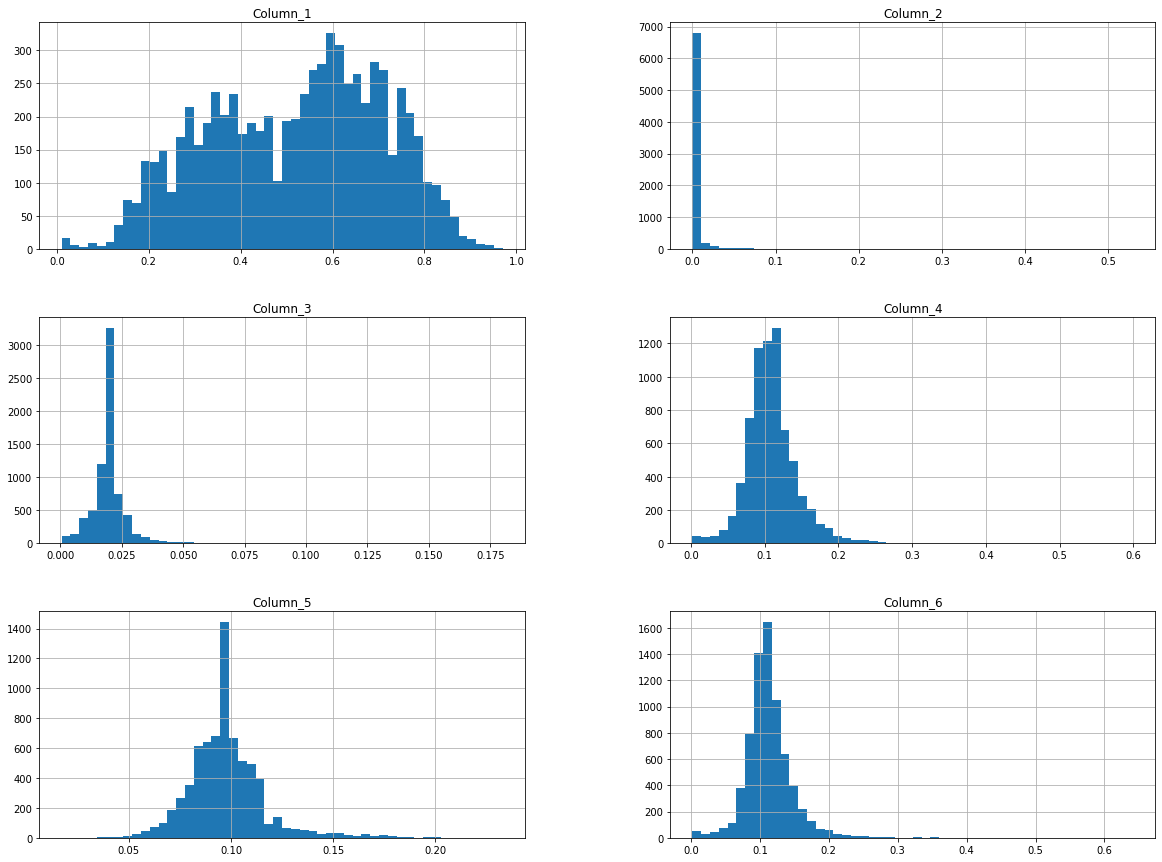

In [ ]:
# plot a histogram for each numerical attribute
%matplotlib inline
import matplotlib.pyplot as plt
df_X.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0febb47d0>,
      dtype=object)

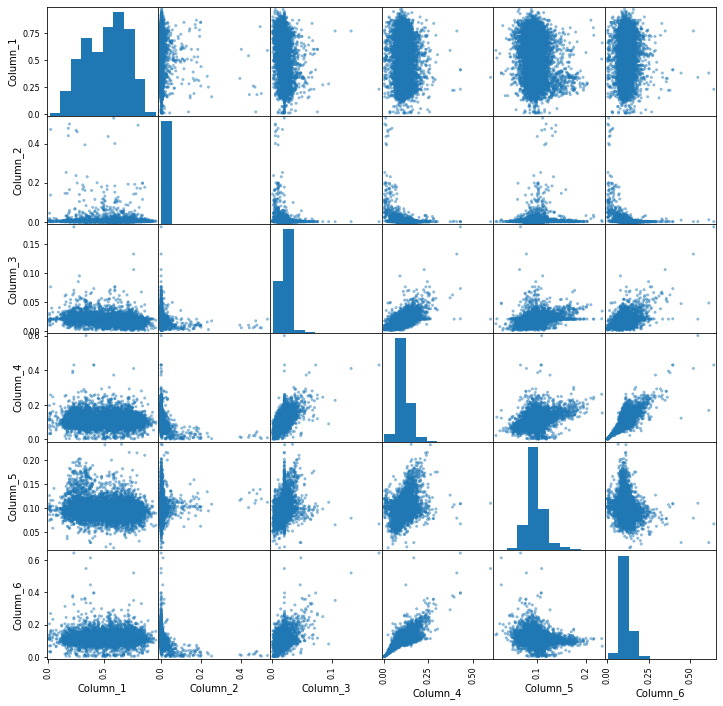

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['Column_1','Column_2','Column_3','Column_4','Column_5','Column_6']
scatter_matrix(df_X[attributes], figsize=(12, 12))

In [ ]:
from sklearn.preprocessing import scale
df_X_scaled = scale(df_X)
df_X_scaled

array([[ 1.10686902, -0.18545824, -0.66016904,  0.29388451, -0.82994022,
         0.9083046 ],
       [-1.48221365, -0.2006904 ,  1.32957936,  0.93337629,  1.84256729,
        -0.14447084],
       [-0.26692995, -0.12888163,  0.53368   , -0.20658732,  1.73776307,
        -0.97560935],
       ...,
       [-0.05557626, -0.17849496,  0.01634541, -0.5402352 , -1.61597184,
         0.5758492 ],
       [-0.90099101, -0.08971321,  0.01634541, -0.5402352 , -0.46312546,
        -0.33840316],
       [ 1.10686902, -0.18719905,  0.01634541, -0.79047111, -0.41072336,
        -0.64315395]])

In [ ]:
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca_scaled = pca_scaled.fit_transform(data_X)



In [ ]:
X_pca_scaled

array([[ 0.10247022, -1.66152353],
       [ 1.72085361,  2.23646988],
       [ 0.03650785,  1.76483979],
       ...,
       [-0.30062692, -1.34139351],
       [-0.47004079,  0.22066981],
       [-0.97151879, -0.58711769]])

In [ ]:
data_y.shape

(7200, 1)

In [ ]:
data_y_reshape = data_y.reshape(-1)
data_y_reshape

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

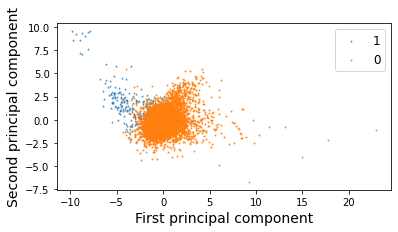

In [ ]:
plt.figure(figsize = (6,6))
plt.scatter(X_pca_scaled[data_y_reshape==1, 0], X_pca_scaled[data_y_reshape==1, 1], 
            marker = '^', alpha=.8, label = '1', s=1)
plt.scatter(X_pca_scaled[data_y_reshape==0, 0], X_pca_scaled[data_y_reshape==0, 1], 
            marker = 'o', alpha=.8, label = '0', s=1)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component", fontsize = 14)
plt.ylabel("Second principal component", fontsize = 14)
plt.legend(loc='best', fontsize = 12)
plt.show()

<Figure size 432x288 with 0 Axes>

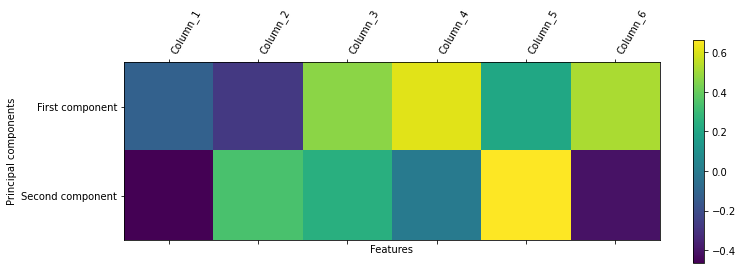

In [ ]:
components = pca_scaled.named_steps['pca'].components_
plt.figure()
plt.matshow(components, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(df_X.shape[1]),
           (['Column_1','Column_2','Column_3','Column_4','Column_5','Column_6']), rotation=60, ha='left')
plt.xlabel("Features")
plt.ylabel("Principal components")
plt.show()

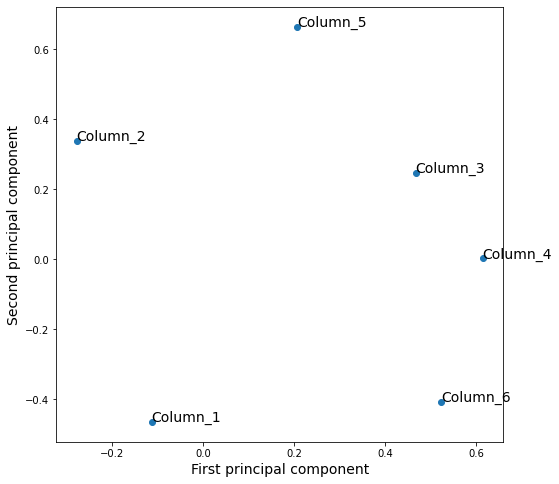

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(components[0], components[1])
for i, feature_contribution in enumerate(components.T):
    plt.annotate(df_X.columns[i], feature_contribution, fontsize = 14)
plt.xlabel("First principal component", fontsize = 14)
plt.ylabel("Second principal component", fontsize = 14)
plt.show()

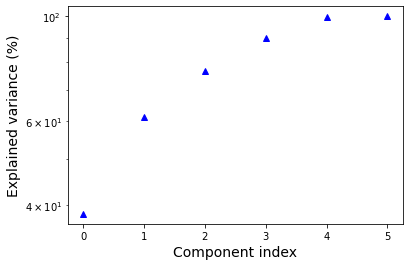

In [ ]:
pca_scaled = make_pipeline(StandardScaler(), PCA())
pca_scaled.fit(df_X)
pca = pca_scaled.named_steps['pca']

plt.figure(figsize=(6,4))
plt.semilogy(np.cumsum(pca.explained_variance_ratio_*100), 'b^')
plt.xlabel("Component index", fontsize = 14)
plt.ylabel("Explained variance (%)", fontsize = 14)
plt.show()

#### Question 1-2: 
Create plots to visualize the data using t-SNE. Would parameter tuning help to gain a better visualization? Discuss your results and findings.

In [ ]:
from sklearn.manifold import TSNE


In [ ]:
# t-SNE
tsne_scaled = make_pipeline(StandardScaler(), TSNE(random_state=42))
data_X_tsne_scaled = tsne_scaled.fit_transform(data_X)

In [ ]:
data_X_tsne_scaled

array([[-55.66992   ,  -0.49899825],
       [ 20.3137    , -64.4873    ],
       [-16.433123  , -33.672215  ],
       ...,
       [  7.7377977 ,  29.85803   ],
       [ 63.370827  ,   5.846495  ],
       [  0.95321864,  50.54135   ]], dtype=float32)

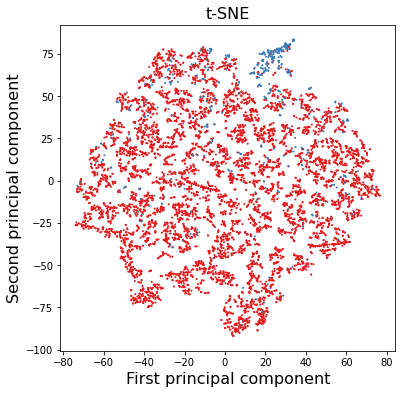

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(data_X_tsne_scaled[:, 0], data_X_tsne_scaled[:, 1], c=plt.cm.Set1(data_y_reshape), s=1)
plt.title("t-SNE", fontsize = 16)
plt.xlabel("First principal component", fontsize = 16)
plt.ylabel("Second principal component", fontsize = 16)
plt.show()

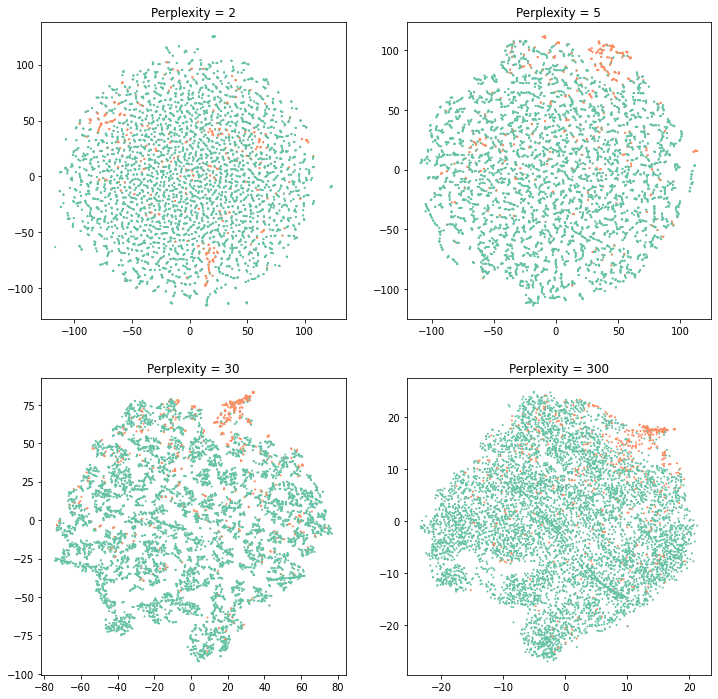

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
for i, perplexity in enumerate([2, 5, 30, 300]):
    plt.sca(axes[i // 2, i % 2])
    tsne_scaled = make_pipeline(StandardScaler(), TSNE(perplexity=perplexity, random_state=42))
    data_X_tsne_scaled = tsne_scaled.fit_transform(data_X)
    plt.scatter(data_X_tsne_scaled[:, 0], data_X_tsne_scaled[:, 1], c=plt.cm.Set2(data_y_reshape), s=1)
    plt.title("Perplexity = {}".format(perplexity))

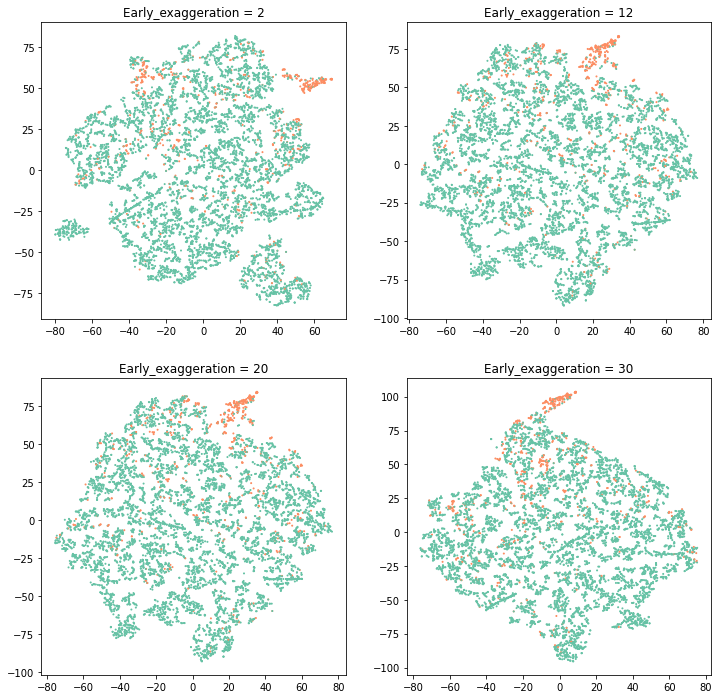

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
for i, early_exaggeration in enumerate([2, 12, 20, 30]):
    plt.sca(axes[i // 2, i % 2])
    tsne_scaled = make_pipeline(StandardScaler(), TSNE(perplexity=30, 
                                                       early_exaggeration=early_exaggeration, random_state=42))
    data_X_tsne_scaled = tsne_scaled.fit_transform(data_X)
    plt.scatter(data_X_tsne_scaled[:, 0], data_X_tsne_scaled[:, 1], c=plt.cm.Set2(data_y_reshape), s=1)
    plt.title("Early_exaggeration = {}".format(early_exaggeration))

#### Question 1-3: 
Use different clustering algorithms to cluster the data: K-Means, DBSCAN, Agglomerative clustering, Gaussian Mixture. For each algorithm, tune the parameters for a reasonable outcome, then document your tuning procedure. 

Pay attention to the sizes of the clusters created. Inspect the outcome, discuss any resulting clusters are meaningful.

#### Quesetion 1-4:
Evaluate your results with the ground truth label (outlier vs. inlier class) using the two scores: [Normalized Mutual Information score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html) and [Adjust Rand Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html ). Discuss how well did you do in previous question.

#### Question 1-5:
Supervised learning with imbalanced data: 
We are using the target variable here. Split the data in train and test set first.

Utilize Random Forest Classifier and another self-selected classification methods, compare the performance on test set, interpret the results in terms of AUC and average precision.

Tune the parameters for Random Forest Classifier, does changing the `class-weight` to `balanced` help? Discuss your results and findings.

### Data for part 2 in this assignment (price prediction):
* URL: https://www.kaggle.com/austinreese/craigslist-carstrucks-data
* On Kaggle Notebook, you can add the data set by searching the above URL
* You do not have to use the whole dataset, it is strongly recommended that you subsample the data while developing your solution.
* The goal of this part is to provide a realistic setting for a machine learning task. Therefore instructions will not specify the exact steps to carry out. Instead, it is part of the assignment to identify promising features, models and preprocessing methods and apply them as appropriate.

In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d austinreese/craigslist-carstrucks-data
! unzip craigslist-carstrucks-data.zip

 95% 254M/267M [00:02<00:00, 131MB/s]
100% 267M/267M [00:02<00:00, 100MB/s]


#### Question 2-1:
Assemble a dataset consisting of predictors/features and target variable from subsampled data. 

What features are relevant for the prediction task?
Are there any features that should be excluded because they leak the target information?
Show visualizations or statistics to support your selection.

In [462]:
#making necessary imports
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pandas_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score
from datetime import datetime as dt
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_columns', 500)

In [12]:
#loading the data
pd.set_option('display.max_columns', 500)
df_vehicle = pd.read_csv("./vehicles.csv")

In [479]:
#trying the first sampling using sample() function
df_test = df_vehicle.sample(frac=0.1, replace=True, random_state=1)
display(df_test.shape)

(45821, 26)

In [480]:
#checking for null values in sample of the data
df_test.isna().sum().to_frame()

,0
Unnamed: 0,0
id,0
url,0
region,0
region_url,0
price,0
year,110
manufacturer,1785
model,488
condition,19273


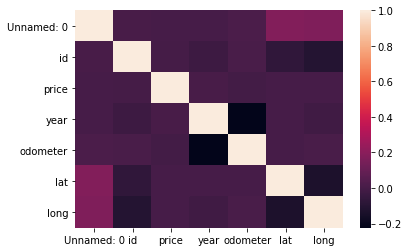

In [481]:
#checking correlation with the sample data
sns.heatmap(df_test.corr())

Using another technique to sample the data that is dropping all the instances with null values to get the sample of the dataset without any null values

One thing to highlight here is, if we sample the using the sample function and select 10% of the dataset then we get 45,821 rows along with missing values thus if we use the dropping null values technique to sample the dataset we will get 42,384 rows with no missing values

In [467]:
#dropping null values from the entire dataset
df = df_vehicle.dropna()
df.shape

(42384, 26)

In [468]:
#selecting numerical and categorical features to Label Encode the dataset and plot distogram of all the features
num_features = list(df.select_dtypes(include=['int64', 'float']).columns)
cat_features = list(df.select_dtypes(include=['object']).columns)


encoded = df[cat_features].apply(LabelEncoder().fit_transform)
new_df = pd.concat([df[num_features], encoded], axis=1)

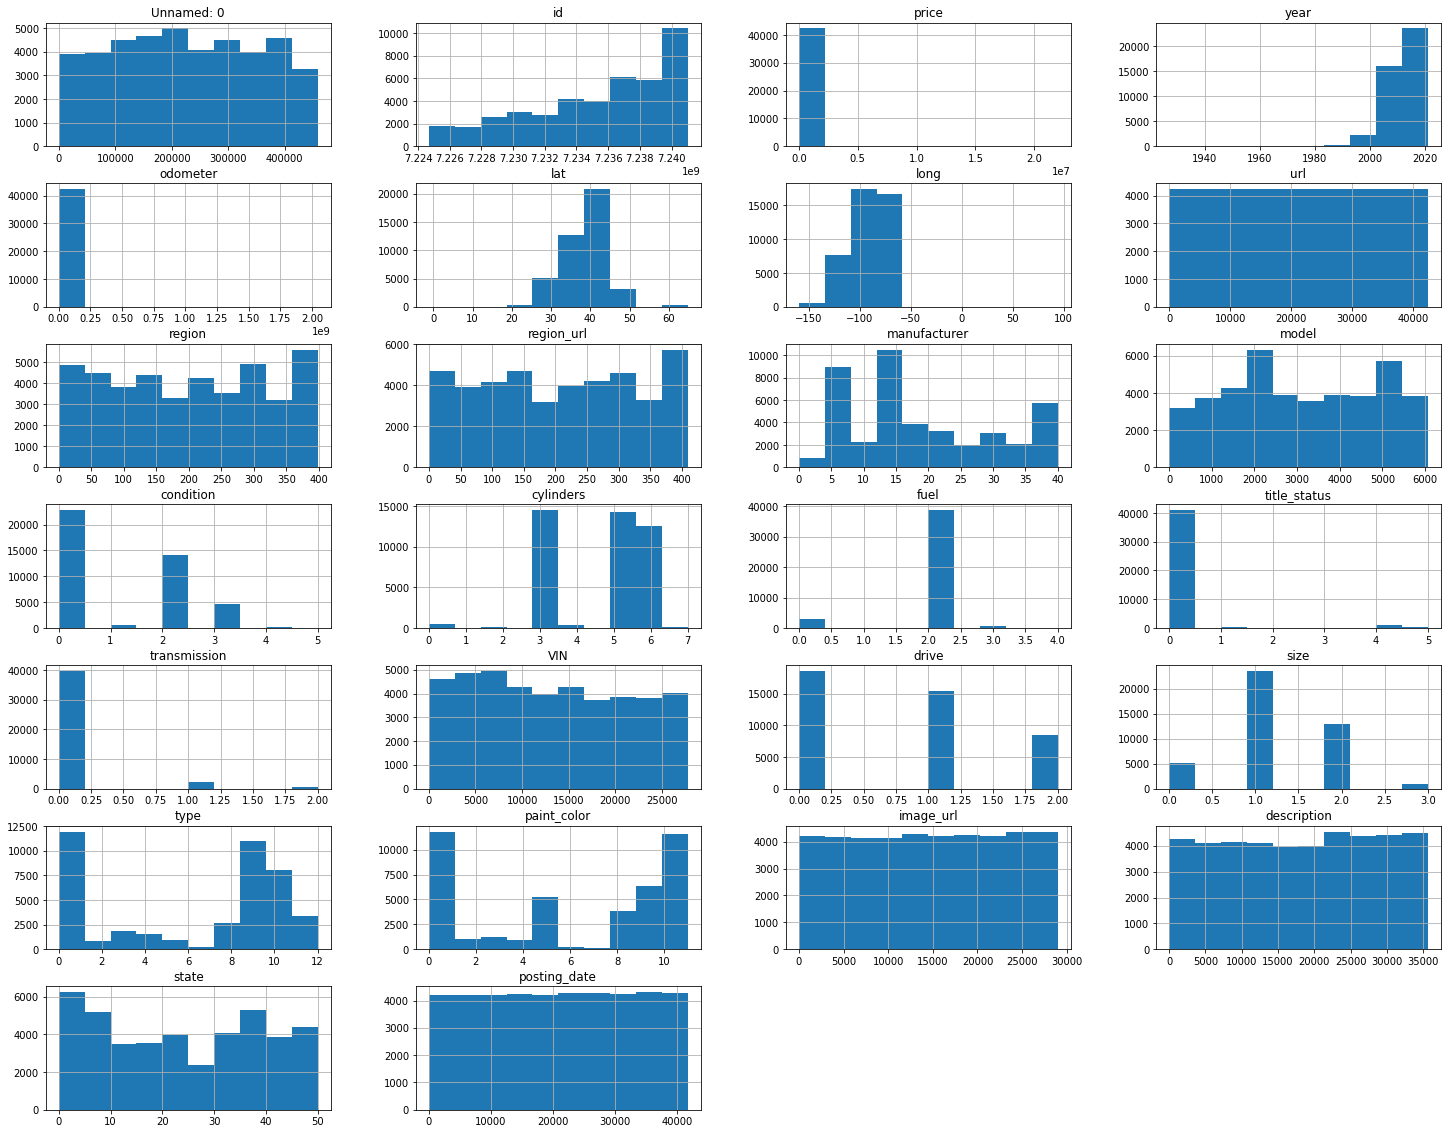

In [469]:
#drawing distogram of all the features
new_df.hist(layout=(7,4), figsize=(25,20))
plt.show()

In [470]:
# dropping 'Unnamed: 0', 'id', 'url','region', 'model', 'region_url', 'image_url', 'description', 'lat', 'long', 'VIN', 'posting_date' columns as they
# have unnecessary values for our predictions as per the graphs above
new_df.drop(['Unnamed: 0', 'id', 'url','region', 'model', 'region_url', 'image_url', 'description', 'lat', 'long', 'VIN', 'posting_date'], inplace=True, axis=1)
display(df.shape)
new_df.head()

(42384, 26)

,price,year,odometer,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
19,47000,2020.0,10500.0,20,3,5,2,0,0,0,1,8,5,1
91,24999,2016.0,18823.0,26,3,3,2,0,0,2,1,9,10,1
92,41900,2016.0,13036.0,20,2,5,2,0,0,0,1,0,10,1
93,23900,2005.0,145970.0,14,2,6,0,0,0,0,1,10,10,1
95,18900,2012.0,177450.0,7,2,6,0,0,0,2,1,10,10,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


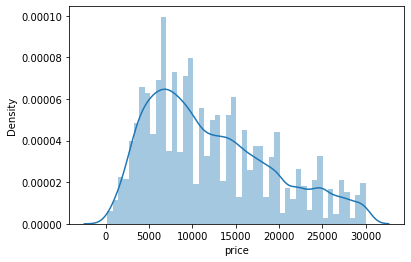

In [21]:
#filtering price over 100 and less than 30,000 to get a better distribution
new_df = new_df.loc[(new_df.price > 100) & (new_df.price<30000)]
sns.distplot(new_df['price'])

In [22]:
new_df

,price,year,odometer,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
91,24999,2016.0,18823.0,26,3,3,2,0,0,2,1,9,10,1
93,23900,2005.0,145970.0,14,2,6,0,0,0,0,1,10,10,1
95,18900,2012.0,177450.0,7,2,6,0,0,0,2,1,10,10,1
96,14916,2016.0,90974.0,7,0,5,2,0,0,1,1,0,9,1
97,21900,2014.0,4491.0,7,3,6,2,0,0,2,1,11,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458141,5250,2012.0,124900.0,13,2,3,2,0,0,1,2,5,9,48
458195,20488,2010.0,63812.0,14,0,6,2,0,0,0,2,10,0,48
458202,4995,2005.0,137962.0,5,2,5,2,0,0,1,0,0,5,48
458204,4495,2006.0,121488.0,5,2,5,2,0,0,1,2,9,0,48


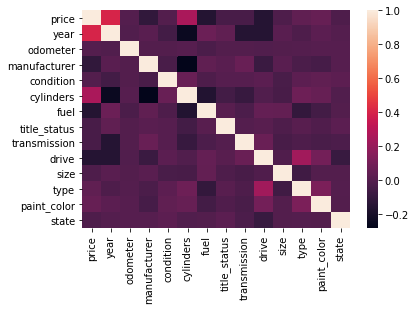

In [23]:
#checking correlation between all the features
sns.heatmap(new_df.corr())

Looking at the correlation matrix we can see that year, manufacturer, cylinders, fuel, drive are correlated with the price so they are relevant for the prediction task.

We've dropped these columns: Unnamed: 0, id, url, region, model, region_url, image_url, description, VIN, posting_date as they had values with were no use to us for predicting the price by looking at the distribution of the graphs and domain knowledge.

We've also dropped the columns: lat, long as we've other feature called state that will give us almost the same information as lat, long. 

#### Question 2-2:
Perform feature selection with a linear model, with appropriate preprocessing and cross-validation, evaluate the generalization performance. 

In [432]:
#dropping null values from the main data to get the sample data
df = df_vehicle.dropna()
#dropping unnecessary columns
df.drop(['Unnamed: 0', 'id', 'url','region', 'model', 'region_url', 'image_url', 'description', 'lat', 'long', 'VIN', 'posting_date'], inplace=True, axis=1)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
19,47000,2020.0,jeep,like new,6 cylinders,gas,10500.0,clean,automatic,4wd,full-size,pickup,grey,al
91,24999,2016.0,mercedes-benz,like new,4 cylinders,gas,18823.0,clean,automatic,rwd,full-size,sedan,white,al
92,41900,2016.0,jeep,good,6 cylinders,gas,13036.0,clean,automatic,4wd,full-size,SUV,white,al
93,23900,2005.0,gmc,good,8 cylinders,diesel,145970.0,clean,automatic,4wd,full-size,truck,white,al
95,18900,2012.0,chevrolet,good,8 cylinders,diesel,177450.0,clean,automatic,rwd,full-size,truck,white,al


In [433]:
#filtering out dataframe by hit and trial to get better dritribution of year, odometer, price
df = df.loc[(df.year>=1990) & ((df.odometer > 100) & (df.odometer < 12000))]
df = df.loc[(df.price > 1000) & (df.price<40000)]

In [434]:
#manually converting several categorical columns to numerical values
cols = ['condition', 'cylinders', 'fuel','title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']
for col in cols:
  different_values = list(df[col].value_counts().keys())
  temp = {}
  for id, value in enumerate(different_values):
    temp[value] = id
  df[col] = df[col].replace(temp)

In [435]:
#using label encoder to convert manufacturer, state columns to numerical columns
encoded = df[['manufacturer', 'state']].apply(LabelEncoder().fit_transform)
rest_cols = set(df.columns) - set(encoded.columns)
new_df = pd.concat([df[rest_cols], encoded], axis=1)

In [436]:
#dividing the data into features and target
X = new_df.drop(["price"], axis=1)
y = new_df["price"]

In [437]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [438]:
#initializing linear regression model
lr = LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [463]:
#checking LR model for CV=5
cv_scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=5)
cv_scores.mean()

0.6671560100455006

In [464]:
#getting the most important features
pd.DataFrame({'features': X_train.columns, 'features_importance':lr.coef_}).sort_values(by='features_importance', ascending=False)[:8]

,features,features_importance
1,transmission,7364.542935
0,drive,3683.739795
7,cylinders,2800.851135
2,fuel,1964.533094
4,condition,1188.586431
8,year,1068.218850
9,type,303.600922
10,paint_color,139.963913



We've used Linear Regression as the linear model to perform feature selection.
Generalized score of the Linear Regression model on test data is 66.7%

#### Question 2-3:
Use any non-linear regression model we introduced (tree, forest, gradient boosting) to improve your result. You can (and probably should) change your preprocessing and feature engineering to be suitable for the model, tune hyperparameters as appropriate. What is the best prediction you can get? Discuss your work here.

You are not required to try all of these models. 

In [149]:
#dropping null values to sample the dataset
df = df_vehicle.dropna()
#dropping unnecessary columns
df.drop(['Unnamed: 0', 'id', 'url','region', 'model', 'region_url', 'image_url', 'description', 'lat', 'long', 'VIN', 'posting_date'], inplace=True, axis=1)
df.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
19,47000,2020.0,jeep,like new,6 cylinders,gas,10500.0,clean,automatic,4wd,full-size,pickup,grey,al
91,24999,2016.0,mercedes-benz,like new,4 cylinders,gas,18823.0,clean,automatic,rwd,full-size,sedan,white,al
92,41900,2016.0,jeep,good,6 cylinders,gas,13036.0,clean,automatic,4wd,full-size,SUV,white,al
93,23900,2005.0,gmc,good,8 cylinders,diesel,145970.0,clean,automatic,4wd,full-size,truck,white,al
95,18900,2012.0,chevrolet,good,8 cylinders,diesel,177450.0,clean,automatic,rwd,full-size,truck,white,al


In [150]:
#filtering dataset to get rid of outliers

#selecting rows with year > 2000
df = df.loc[df.year>=2000]

#selecting price distribution between 100 and 30,000
df = df.loc[(df.price > 100) & (df.price<30000)]

#selecting rows with odometer between 1000 and 100,000
df = df.loc[(df.odometer > 1000) & (df.odometer < 100000)]

#normalizing the odometer column by diving the column by it's mean
df['odometer'] = df['odometer']/df['odometer'].mean()

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14504 entries, 91 to 458195
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         14504 non-null  int64  
 1   year          14504 non-null  float64
 2   manufacturer  14504 non-null  object 
 3   condition     14504 non-null  object 
 4   cylinders     14504 non-null  object 
 5   fuel          14504 non-null  object 
 6   odometer      14504 non-null  float64
 7   title_status  14504 non-null  object 
 8   transmission  14504 non-null  object 
 9   drive         14504 non-null  object 
 10  size          14504 non-null  object 
 11  type          14504 non-null  object 
 12  paint_color   14504 non-null  object 
 13  state         14504 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 1.7+ MB


In [152]:
df.describe()

,price,year,odometer
count,14504.000000,14504.000000,14504.000000
mean,15496.143960,2013.488210,1.000000
std,6963.952971,4.105534,0.397165
min,179.000000,2000.000000,0.015987
25%,9995.000000,2012.000000,0.699839
50%,14980.000000,2014.000000,1.075357
75%,20084.000000,2017.000000,1.340250
max,29999.000000,2020.000000,1.555135


In [153]:
df.describe(include=["object"])

,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
count,14504,14504,14504,14504,14504,14504,14504,14504,14504,14504,14504
unique,37,6,8,5,5,3,3,4,13,12,51
top,ford,excellent,4 cylinders,gas,clean,automatic,fwd,full-size,sedan,white,ca
freq,2605,8523,7296,13816,13649,13575,6745,6452,4852,3454,1383


In [154]:
#selecting numerical and categorical features
num_features = list(df.select_dtypes(include=['int64', 'float']).columns)
cat_features = list(df.select_dtypes(include=['object']).columns)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


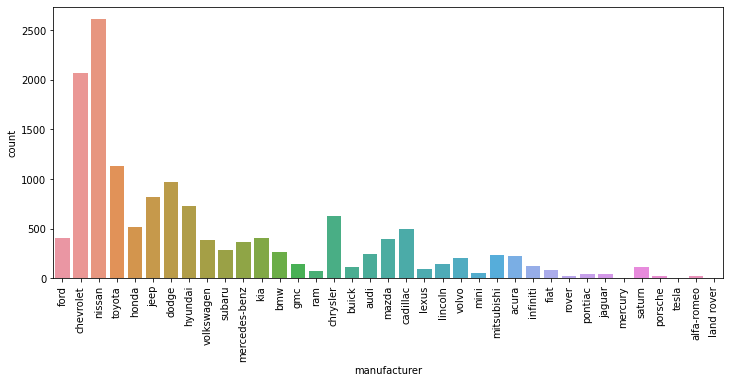

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


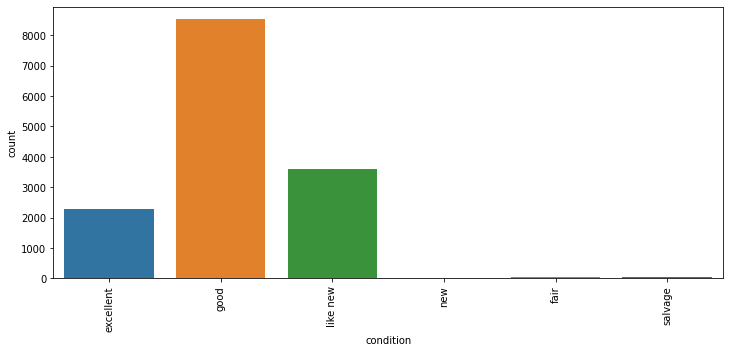

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


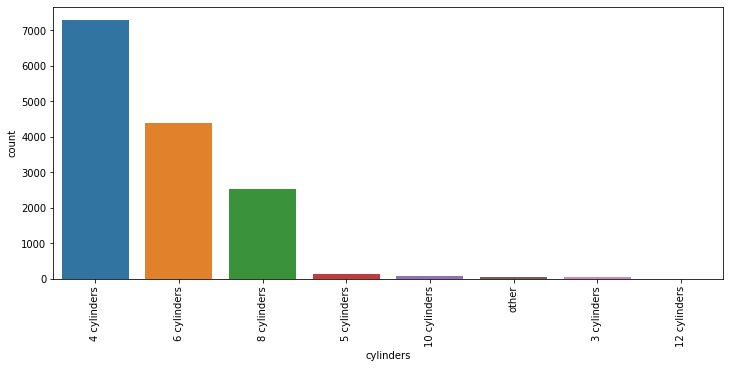

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


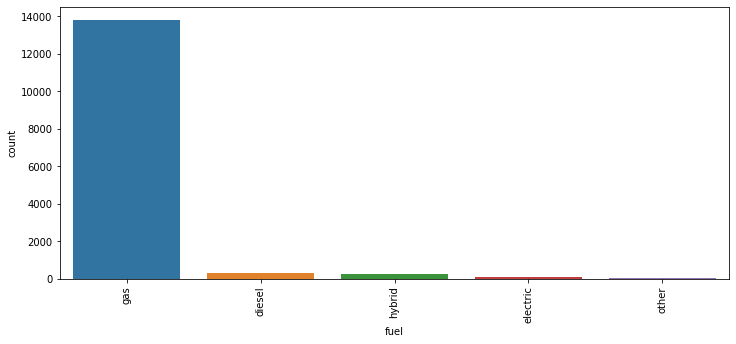

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


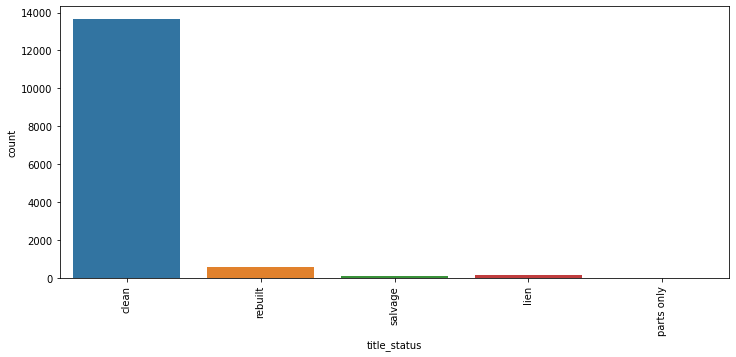

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


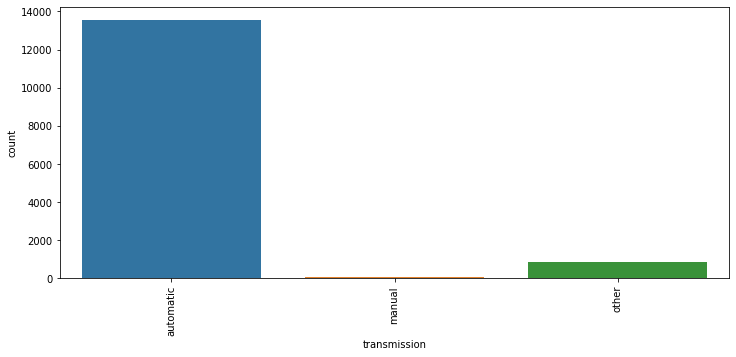

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


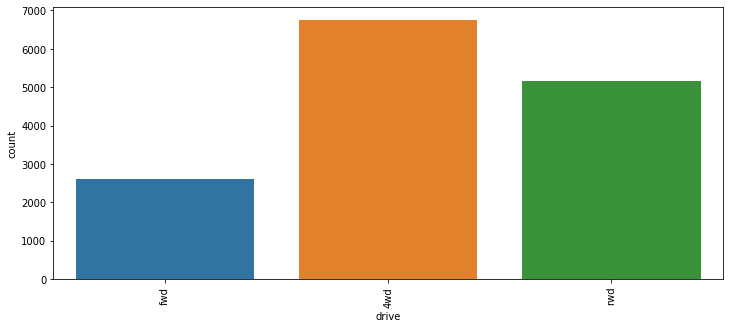

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


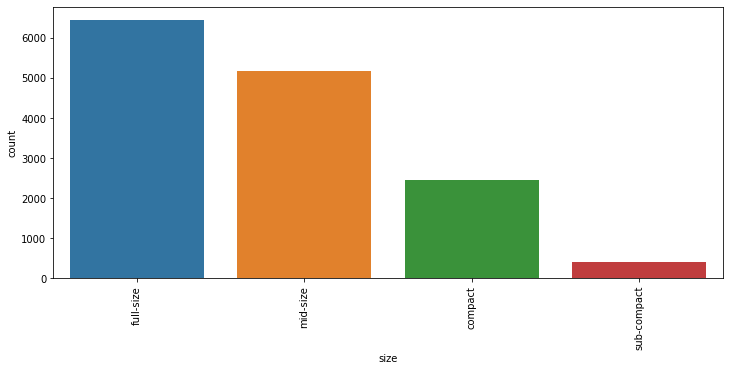

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


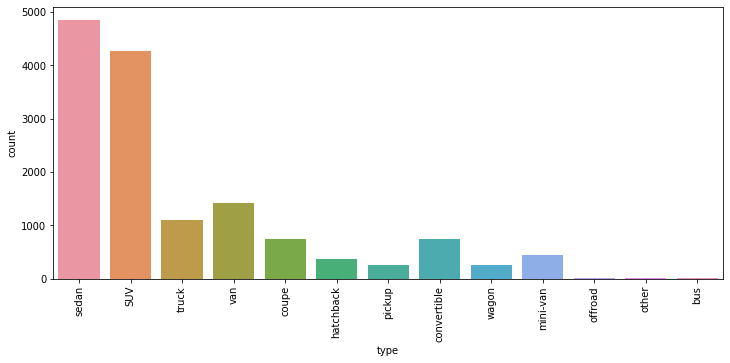

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


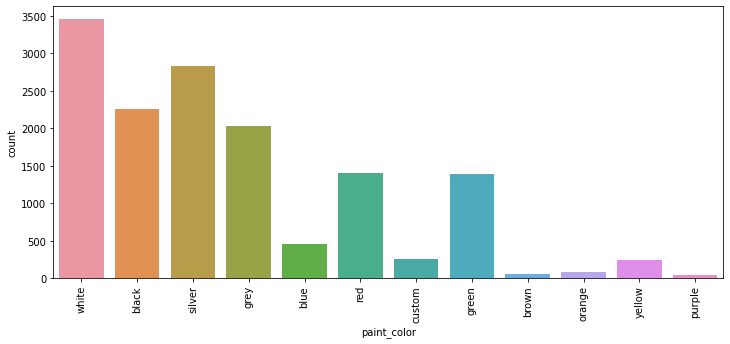

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


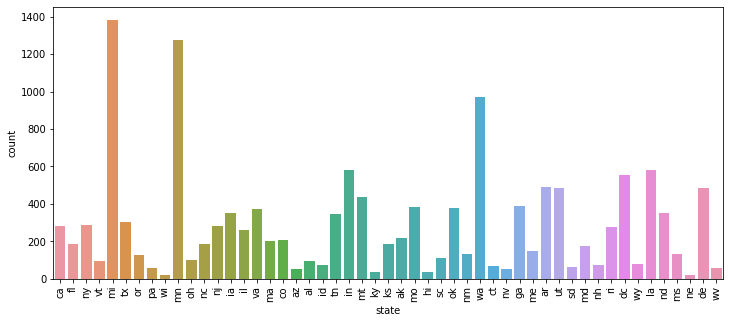

In [155]:
#plotting categorical features to understand the distribution
for i in cat_features:
    plt.figure(figsize=(12,5));
    sns.countplot(df[i]).set_xticklabels(labels=df[i].value_counts().index,rotation=90);
    
    plt.show()

In [156]:
#creating a new feature called "years_old"
df['years_old'] = dt.now().year - df['year']

In [157]:
df

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,years_old
91,24999,2016.0,mercedes-benz,like new,4 cylinders,gas,0.292735,clean,automatic,rwd,full-size,sedan,white,al,5.0
96,14916,2016.0,chevrolet,excellent,6 cylinders,gas,1.414826,clean,automatic,fwd,full-size,SUV,silver,al,5.0
97,21900,2014.0,chevrolet,like new,8 cylinders,gas,0.069844,clean,automatic,rwd,full-size,van,white,al,7.0
145,20990,2015.0,chevrolet,good,8 cylinders,gas,1.544964,clean,automatic,rwd,full-size,truck,white,al,6.0
146,16490,2006.0,ford,good,6 cylinders,diesel,0.805686,clean,automatic,rwd,full-size,truck,white,al,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458049,13995,2012.0,acura,like new,6 cylinders,gas,0.897458,clean,automatic,fwd,full-size,sedan,grey,wi,9.0
458053,9995,2012.0,volkswagen,like new,5 cylinders,gas,0.944207,clean,automatic,fwd,full-size,sedan,silver,wi,9.0
458058,12995,2015.0,chevrolet,like new,6 cylinders,gas,0.868314,clean,automatic,fwd,full-size,sedan,red,wi,6.0
458139,3300,2006.0,mazda,good,6 cylinders,gas,0.869355,clean,automatic,fwd,mid-size,sedan,silver,wi,15.0


In [160]:
#dividing the dataset between target and feature
X = df.drop(["price"], axis=1)
y = df["price"]

In [162]:
#replacing condition of the car manually
X.condition = X.condition.replace({"salvage":1,"new":2,"fair":3,"like new":4,"good":5,"excellent":6})

#using pandas get_dummies method to convert the categorical columns to multiple binary numerical columns
X = pd.get_dummies(X,drop_first=True)
X.head()

,year,condition,odometer,years_old,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,drive_fwd,drive_rwd,size_full-size,size_mid-size,size_sub-compact,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
91,2016.0,4,0.292735,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,2016.0,6,1.414826,5.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,2014.0,4,0.069844,7.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145,2015.0,5,1.544964,6.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
146,2006.0,5,0.805686,15.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [163]:
#splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [191]:
#initializing hyperparameters to train the model
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [5, 7, 10],
    'min_child_weight': [1, 3],
    'n_estimators' : [50, 100],
    'objective': ['reg:squarederror']
}

#initializing the XBG regressor
xgb_model = XGBRegressor()

#initializing the GridSearchCV object with hyperparameters grid
xgb_gs = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,                        
                        cv = 5)
#fitting the GridSearchCV object with X_train and y_train
xgb_gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1], 'max_depth': [10],
                         'min_child_weight': [1, 3], 'n_estimato

In [208]:
#getting the best extimor from all the hyperparameters
xgb_gs.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=3, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [193]:
#getting predictions on X_test
y_pred = xgb_gs.predict(X_test)

#calculating r2 for training set
r2_train = xgb_gs.score(X_train,y_train)

#calculating r2 for testing set
r2_test = xgb_gs.score(X_test,y_test)

#calculating testing RMSE
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))

#calculating testing MSE
mse_test = mean_squared_error(y_test,y_pred)

In [194]:
#printing all the calculated scores and errors
print('r2_train', r2_train, 'r2_test', r2_test, 'RMSE', rmse_test, 'MSE', mse_test)

r2_train 0.9430435297200341 r2_test 0.8485555563190283 RMSE 2716.8633127100534 MSE 7381346.259949844


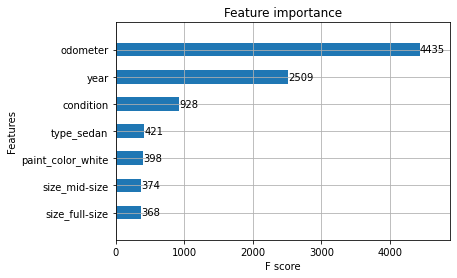

In [207]:
#plotting feature importances
plot_importance(xgb_gs.best_estimator_ ,max_num_features=7, height=0.5)

The generalized score from our Linear Regression model was 66.7% so we've used XGBoost to improve the results.

We've changed the entire process of EDA, pre-processing, feature engineering in XGBoost along with tuning the hyperparameters.

The best results we got are from this model:

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=3, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)


r2_train = 0.9430435297200341 

r2_test = 0.8485555563190283 

RMSE = 2716.8633127100534 

MSE = 7381346.259949844